<a href="https://colab.research.google.com/github/Purinkai001/Train/blob/main/Acetylcholine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 28.3 MB/s eta 0:00:00


In [2]:
import rdkit
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

!pip install lazypredict

! pip install chembl_webresource_client
from chembl_webresource_client.new_client import new_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.0 MB/s eta 0:00:00


In [3]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


In [4]:
selected_target = targets.target_chembl_id[0]
selected_target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
activity_data = pd.DataFrame.from_dict(res)
activity_data.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [5]:
activity_data.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [6]:
activity_data = activity_data[activity_data.canonical_smiles.notna()]
activity_data = activity_data[activity_data.standard_value.notna()]
activity_data = activity_data.drop_duplicates(['canonical_smiles'])
activity_data
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
activity_data=activity_data[selection]
activity_data

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.0
9087,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.0
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73


In [7]:
bioactivity = []
for i in activity_data.standard_value:
  if float(i) >= 10000:
    bioactivity.append("inactive")
  else:
    bioactivity.append("active")
pd.concat([activity_data,pd.Series(bioactivity)],axis=1)

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6282,NaN,NaN,NaN,active
6283,NaN,NaN,NaN,active
6296,NaN,NaN,NaN,active
6317,NaN,NaN,NaN,active


In [8]:
df = activity_data.copy()

df_no_smiles = df.drop(columns='canonical_smiles')

smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles.isna().sum()
df_clean_smiles.dropna(inplace=True)
df_clean_smiles


,molecule_chembl_id,standard_value,canonical_smiles
0,CHEMBL133897,750.0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...
6364,CHEMBL4077169,12300.0,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl
6365,CHEMBL4065259,11800.0,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...
6366,CHEMBL4075825,18800.0,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O
6367,CHEMBL4075624,16700.0,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...


In [9]:
#Lipinski factors
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0


    baseData= np.arange(1,1)
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

lipinski_factors = lipinski(df_clean_smiles.canonical_smiles)
lipinski_factors

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
4158,331.868,5.28790,0.0,3.0
4159,414.477,3.95740,3.0,4.0
4160,325.368,1.14840,2.0,4.0
4161,511.626,5.60034,1.0,8.0


In [10]:
df_final = pd.concat([df_clean_smiles,lipinski_factors], axis=1)
df_final.dropna(inplace=True)
df_final


,molecule_chembl_id,standard_value,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.80320,0.0,6.0
1,CHEMBL336398,100.0,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.55460,0.0,5.0
2,CHEMBL131588,50000.0,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.35740,0.0,5.0
3,CHEMBL130628,300.0,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.70690,0.0,5.0
4,CHEMBL130478,800.0,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.09530,0.0,6.0
...,...,...,...,...,...,...,...
4153,CHEMBL2088785,9.4,C[n+]1c2ccccc2c(-c2cc(C(C)(C)C)cc(C(C)(C)C)c2O...,473.501,3.98510,1.0,6.0
4154,CHEMBL2088786,70.0,Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1O,473.501,3.98510,1.0,6.0
4156,CHEMBL2147460,5.18,C[n+]1c2ccccc2c(-c2c(O)ccc3ccccc23)c2ccccc21,396.730,6.00362,1.0,4.0
4157,CHEMBL2147462,3.52,C[n+]1c2ccccc2c(-c2cccs2)c2ccccc21,311.450,4.94292,0.0,3.0


In [11]:
def norm(input):
  norm = []

  for i in input['standard_value']:
    i = float(i)
    if i > 1000000000:
      i = 1000000000
    norm.append(i)
  input['standard_value_norm'] = norm
  x = input.drop(columns='standard_value')
  return x
df_fin = norm(df_final)
df_fin[df_fin.standard_value_norm>1000000000]

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm


In [12]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns='standard_value_norm')
    return x

pIC = pIC50(df_fin)
pIC


,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...
4153,CHEMBL2088785,C[n+]1c2ccccc2c(-c2cc(C(C)(C)C)cc(C(C)(C)C)c2O...,473.501,3.98510,1.0,6.0,8.026872
4154,CHEMBL2088786,Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1O,473.501,3.98510,1.0,6.0,7.154902
4156,CHEMBL2147460,C[n+]1c2ccccc2c(-c2c(O)ccc3ccccc23)c2ccccc21,396.730,6.00362,1.0,4.0,8.285670
4157,CHEMBL2147462,C[n+]1c2ccccc2c(-c2cccs2)c2ccccc21,311.450,4.94292,0.0,3.0,8.453457


In [13]:
!pip install padelpy

import padelpy
from padelpy import padeldescriptor, from_smiles

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 49.7 MB/s eta 0:00:00


In [38]:
pIC[['canonical_smiles','molecule_chembl_id']].to_csv('molecule.smi', sep='\t', index=False, header=False)
pIC[['canonical_smiles','molecule_chembl_id']].to_csv('molecule.csv', sep='\t', index=False, header=False)
pIC[['canonical_smiles','molecule_chembl_id']]

pIC.isna().sum()

,0
molecule_chembl_id,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
pIC50,0


In [39]:
check1 = pd.read_csv('molecule.csv')
check1

,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1\tCHEMBL133897
0,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1\tCH...
1,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccc...
2,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F\...
3,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C\tCHE...
4,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1\tCHEM...
...,...
2488,C[n+]1c2ccccc2c(-c2cc(C(C)(C)C)cc(C(C)(C)C)c2O...
2489,Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1O\tCH...
2490,C[n+]1c2ccccc2c(-c2c(O)ccc3ccccc23)c2ccccc21\t...
2491,C[n+]1c2ccccc2c(-c2cccs2)c2ccccc21\tCHEMBL2147462


In [40]:
padeldescriptor(mol_dir = '/content/molecule.smi', d_file='/content/descriptors.csv',d_2d=True, d_3d=True, fingerprints=True,removesalt=True,standardizenitro=True,detectaromaticity=True)

In [41]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-09-25 13:01:10--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-09-25 13:01:10--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  --.-KB/s    in 0.07s   

2024-09-25 13:01:10 (329 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2024-09-25 13:01:10--  https://gi

In [42]:
! unzip padel.zip


Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [43]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [44]:
! cat molecule.smi | wc -l

2494


In [45]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [46]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/2494). 
Processing CHEMBL336398 in molecule.smi (2/2494). 
Processing CHEMBL131588 in molecule.smi (3/2494). Average speed: 4.44 s/mol.
Processing CHEMBL130628 in molecule.smi (4/2494). Average speed: 2.29 s/mol.
Processing CHEMBL130478 in molecule.smi (5/2494). Average speed: 1.75 s/mol.
Processing CHEMBL130112 in molecule.smi (6/2494). Average speed: 1.35 s/mol.
Processing CHEMBL130098 in molecule.smi (7/2494). Average speed: 1.13 s/mol.
Processing CHEMBL336538 in molecule.smi (9/2494). Average speed: 1.04 s/mol.
Processing CHEMBL337486 in molecule.smi (8/2494). Average speed: 1.00 s/mol.
Processing CHEMBL131051 in molecule.smi (10/2494). Average speed: 0.83 s/mol.
Processing CHEMBL341437 in molecule.smi (11/2494). Average speed: 0.84 s/mol.
Processing CHEMBL335033 in molecule.smi (12/2494). Average speed: 0.73 s/mol.
Processing CHEMBL122983 in molecule.smi (13/2494). Average speed: 0.68 s/mol.
Processing CHEMBL338720 in molecule.smi (14/249

In [47]:
output = pd.read_csv('descriptors_output.csv')
output
#WTF

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,CHEMBL2088785,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2490,CHEMBL2088786,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2491,CHEMBL2147462,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2492,CHEMBL2147460,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split

Y = pIC.pIC50


from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = output.drop(columns=['Name'])
X = selection.fit_transform(X)
X.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1995, 135), (1995,), (499, 135), (499,))

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.28385861414520397

Text(0, 0.5, 'Predicted pIC50')

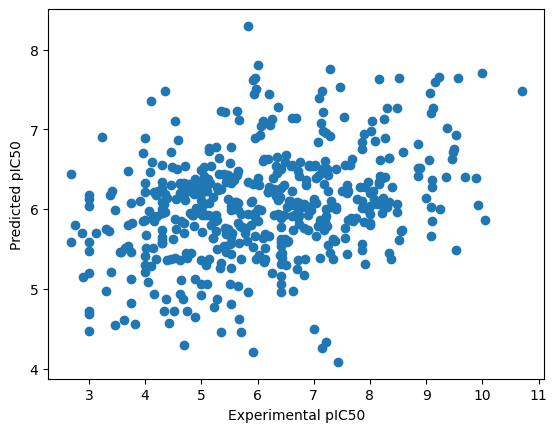

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
predict = model.predict(X_test)

plt.plot(Y_test, predict, 'o')
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')